# 1) Import all necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2) Import the CSV

In [2]:
a=pd.read_csv("dim_customers.csv")  #Loading Dataset into vaariable a and b
b=pd.read_csv("fact_spends.csv") 

## 3) Check the dim_customers file and <br> using describe function we get insight of the data 

In [3]:
a.head()    # Top 5 data

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767
1,ATQCUS0002,21-24,Mumbai,Salaried IT Employees,Male,Married,47336
2,ATQCUS0003,21-24,Mumbai,Salaried IT Employees,Male,Married,48851
3,ATQCUS0004,21-24,Mumbai,Salaried IT Employees,Male,Married,45425
4,ATQCUS0005,21-24,Mumbai,Salaried IT Employees,Male,Married,46732


In [4]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [5]:
a.describe(exclude='int')

,customer_id,age_group,city,occupation,gender,marital status
count,4000,4000,4000,4000,4000,4000
unique,4000,4,5,5,2,2
top,ATQCUS0001,25-34,Mumbai,Salaried IT Employees,Male,Married
freq,1,1498,1078,1294,2597,3136


In [6]:
a.describe()

,avg_income
count,4000.000000
mean,51657.032250
std,14690.140645
min,24816.000000
25%,38701.000000
50%,50422.000000
75%,64773.250000
max,86600.000000


## 4) Check the fact_spends file to get insights <br>using describe function we get insight of the data 

In [7]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


In [8]:
b.describe()

,spend
count,864000.000000
mean,614.464994
std,661.571676
min,6.000000
25%,191.000000
50%,395.000000
75%,793.000000
max,10313.000000


In [9]:
b.describe(exclude=int)

,customer_id,month,category,payment_type
count,864000,864000,864000,864000
unique,4000,6,9,4
top,ATQCUS0001,May,Groceries,Net Banking
freq,216,144000,96000,216000


### After seeing b.describe we can see there are 6 unique months, there are 864000 rows of data , 4 different payment types and 9 different catogories payment made.<br>
And more importantly no non null values

Since we have Data of customer's average income permonth in Dataset A and Dataset B has the Spending data. Now we group the Dataset B based on the customer_id and we aggregate the columns on Spending data to sum it and month column on unique and Nunique<br>
<br>
<b>Grouping on Customer_id<br></b>
Month  -  Unique   (Generate column with list of all unique months as list)<br>
Month  -  Nunique  (Generate column with no of unique months)<br>
Spend  -  Sum      (Sum of all the spending total of a individual customer)<br>

The purpose of nunique of months is to divide the spending column and get average spending of a customer<br>
avg_spend = spend /month_nunique<br>

And using Average Spend we can merge the dataframe to dataset A <br>

In [10]:

c = b.groupby(by='customer_id').agg({'month':'unique','spend':'sum'})   # Grouping Dataframe B and Aggregating the grouped dataframe 
c.reset_index(inplace=True)

In [11]:
c

,customer_id,month,spend
0,ATQCUS0001,"[May, June, July, August, September, October]",170545
1,ATQCUS0002,"[May, June, July, August, September, October]",168514
2,ATQCUS0003,"[May, June, July, August, September, October]",157534
3,ATQCUS0004,"[May, June, July, August, September, October]",162655
4,ATQCUS0005,"[May, June, July, August, September, October]",157296
...,...,...,...
3995,ATQCUS3996,"[May, June, July, August, September, October]",99589
3996,ATQCUS3997,"[May, June, July, August, September, October]",56264
3997,ATQCUS3998,"[May, June, July, August, September, October]",59760
3998,ATQCUS3999,"[May, June, July, August, September, October]",67142


In [12]:
a_grp = b.groupby(by='customer_id')['month'].nunique().reset_index()    # Grouping dataset B and aggregating on month on n unique 

In [13]:
a_grp

,customer_id,month
0,ATQCUS0001,6
1,ATQCUS0002,6
2,ATQCUS0003,6
3,ATQCUS0004,6
4,ATQCUS0005,6
...,...,...
3995,ATQCUS3996,6
3996,ATQCUS3997,6
3997,ATQCUS3998,6
3998,ATQCUS3999,6


In [14]:
a_grp=pd.merge(left=c,right=a_grp,on='customer_id',how='inner')  # Merging unique , nunique of months and spend sum based on customer id into a single datafram

In [15]:
a_grp['spend_avg']=a_grp['spend']/a_grp['month_y']   # Dividing the spend column and nunique months 
a_grp

,customer_id,month_x,spend,month_y,spend_avg
0,ATQCUS0001,"[May, June, July, August, September, October]",170545,6,28424.166667
1,ATQCUS0002,"[May, June, July, August, September, October]",168514,6,28085.666667
2,ATQCUS0003,"[May, June, July, August, September, October]",157534,6,26255.666667
3,ATQCUS0004,"[May, June, July, August, September, October]",162655,6,27109.166667
4,ATQCUS0005,"[May, June, July, August, September, October]",157296,6,26216.000000
...,...,...,...,...,...
3995,ATQCUS3996,"[May, June, July, August, September, October]",99589,6,16598.166667
3996,ATQCUS3997,"[May, June, July, August, September, October]",56264,6,9377.333333
3997,ATQCUS3998,"[May, June, July, August, September, October]",59760,6,9960.000000
3998,ATQCUS3999,"[May, June, July, August, September, October]",67142,6,11190.333333


In [16]:
a_grp

,customer_id,month_x,spend,month_y,spend_avg
0,ATQCUS0001,"[May, June, July, August, September, October]",170545,6,28424.166667
1,ATQCUS0002,"[May, June, July, August, September, October]",168514,6,28085.666667
2,ATQCUS0003,"[May, June, July, August, September, October]",157534,6,26255.666667
3,ATQCUS0004,"[May, June, July, August, September, October]",162655,6,27109.166667
4,ATQCUS0005,"[May, June, July, August, September, October]",157296,6,26216.000000
...,...,...,...,...,...
3995,ATQCUS3996,"[May, June, July, August, September, October]",99589,6,16598.166667
3996,ATQCUS3997,"[May, June, July, August, September, October]",56264,6,9377.333333
3997,ATQCUS3998,"[May, June, July, August, September, October]",59760,6,9960.000000
3998,ATQCUS3999,"[May, June, July, August, September, October]",67142,6,11190.333333


In [17]:
b.groupby(by='customer_id').agg({'month':'unique','month':'nunique','spend':'sum'}).reset_index()  # We can do group by on single aggregation but the unique column is skipped

,customer_id,month,spend
0,ATQCUS0001,6,170545
1,ATQCUS0002,6,168514
2,ATQCUS0003,6,157534
3,ATQCUS0004,6,162655
4,ATQCUS0005,6,157296
...,...,...,...
3995,ATQCUS3996,6,99589
3996,ATQCUS3997,6,56264
3997,ATQCUS3998,6,59760
3998,ATQCUS3999,6,67142


In [18]:
test = b.groupby(by='customer_id').agg({'month':['unique','nunique'],'spend':'sum'}).reset_index()  # Or by this way we can get but we get Multi Indexing 
test

customer_id                                          month          \
                                                         unique nunique   
0     ATQCUS0001  [May, June, July, August, September, October]       6   
1     ATQCUS0002  [May, June, July, August, September, October]       6   
2     ATQCUS0003  [May, June, July, August, September, October]       6   
3     ATQCUS0004  [May, June, July, August, September, October]       6   
4     ATQCUS0005  [May, June, July, August, September, October]       6   
...          ...                                            ...     ...   
3995  ATQCUS3996  [May, June, July, August, September, October]       6   
3996  ATQCUS3997  [May, June, July, August, September, October]       6   
3997  ATQCUS3998  [May, June, July, August, September, October]       6   
3998  ATQCUS3999  [May, June, July, August, September, October]       6   
3999  ATQCUS4000  [May, June, July, August, September, October]       6   

       spend  
         sum  
0     170545  
1     168514  
2     157534  
3     162655  
4     157296  
...      ...  
3995   99589  
3996   56264  
3997   59760  
3998   67142  
3999   53549  

[4000 rows x 4 columns]

In [19]:
test.columns=['customer_id' , 'num_month','unique_month','spend']        # Selecting the columns to the dataframe and printing it , Either way its the same
test

,customer_id,num_month,unique_month,spend
0,ATQCUS0001,"[May, June, July, August, September, October]",6,170545
1,ATQCUS0002,"[May, June, July, August, September, October]",6,168514
2,ATQCUS0003,"[May, June, July, August, September, October]",6,157534
3,ATQCUS0004,"[May, June, July, August, September, October]",6,162655
4,ATQCUS0005,"[May, June, July, August, September, October]",6,157296
...,...,...,...,...
3995,ATQCUS3996,"[May, June, July, August, September, October]",6,99589
3996,ATQCUS3997,"[May, June, July, August, September, October]",6,56264
3997,ATQCUS3998,"[May, June, July, August, September, October]",6,59760
3998,ATQCUS3999,"[May, June, July, August, September, October]",6,67142


In [20]:
a=a.merge(right=a_grp,on='customer_id',how='inner')  # Merging the aggregations into to Dataset A on customer_id 


In [21]:
a.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,month_x,spend,month_y,spend_avg
0,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,"[May, June, July, August, September, October]",170545,6,28424.166667
1,ATQCUS0002,21-24,Mumbai,Salaried IT Employees,Male,Married,47336,"[May, June, July, August, September, October]",168514,6,28085.666667
2,ATQCUS0003,21-24,Mumbai,Salaried IT Employees,Male,Married,48851,"[May, June, July, August, September, October]",157534,6,26255.666667
3,ATQCUS0004,21-24,Mumbai,Salaried IT Employees,Male,Married,45425,"[May, June, July, August, September, October]",162655,6,27109.166667
4,ATQCUS0005,21-24,Mumbai,Salaried IT Employees,Male,Married,46732,"[May, June, July, August, September, October]",157296,6,26216.000000


In [22]:
a.drop(columns=['month_x','spend','month_y'],inplace=True)   # Droping the columns not needed
a

,customer_id,age_group,city,occupation,gender,marital status,avg_income,spend_avg
0,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,28424.166667
1,ATQCUS0002,21-24,Mumbai,Salaried IT Employees,Male,Married,47336,28085.666667
2,ATQCUS0003,21-24,Mumbai,Salaried IT Employees,Male,Married,48851,26255.666667
3,ATQCUS0004,21-24,Mumbai,Salaried IT Employees,Male,Married,45425,27109.166667
4,ATQCUS0005,21-24,Mumbai,Salaried IT Employees,Male,Married,46732,26216.000000
...,...,...,...,...,...,...,...,...
3995,ATQCUS3996,25-34,Chennai,Business Owners,Female,Single,68003,16598.166667
3996,ATQCUS3997,25-34,Chennai,Freelancers,Female,Single,33323,9377.333333
3997,ATQCUS3998,25-34,Chennai,Freelancers,Female,Single,33336,9960.000000
3998,ATQCUS3999,25-34,Chennai,Freelancers,Female,Single,37453,11190.333333


In [23]:
a['Income_util_prctg']=a.spend_avg/a.avg_income
a

,customer_id,age_group,city,occupation,gender,marital status,avg_income,spend_avg,Income_util_prctg
0,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,28424.166667,0.571145
1,ATQCUS0002,21-24,Mumbai,Salaried IT Employees,Male,Married,47336,28085.666667,0.593326
2,ATQCUS0003,21-24,Mumbai,Salaried IT Employees,Male,Married,48851,26255.666667,0.537464
3,ATQCUS0004,21-24,Mumbai,Salaried IT Employees,Male,Married,45425,27109.166667,0.596790
4,ATQCUS0005,21-24,Mumbai,Salaried IT Employees,Male,Married,46732,26216.000000,0.560986
...,...,...,...,...,...,...,...,...,...
3995,ATQCUS3996,25-34,Chennai,Business Owners,Female,Single,68003,16598.166667,0.244080
3996,ATQCUS3997,25-34,Chennai,Freelancers,Female,Single,33323,9377.333333,0.281407
3997,ATQCUS3998,25-34,Chennai,Freelancers,Female,Single,33336,9960.000000,0.298776
3998,ATQCUS3999,25-34,Chennai,Freelancers,Female,Single,37453,11190.333333,0.298783


In [24]:
a.to_csv('output.csv',index=False)   # Exporting the Dataset as CSV for Tableau

Note : The Spend aggreagation can be simply divided by 6 but if there is a customer less than 6 months it might be problem and to keep it <b> dynamic </b> we divide total spend by nunique of months 

## Histogram Plots

In [25]:
plt.style.use('dark_background')   # Dark Background

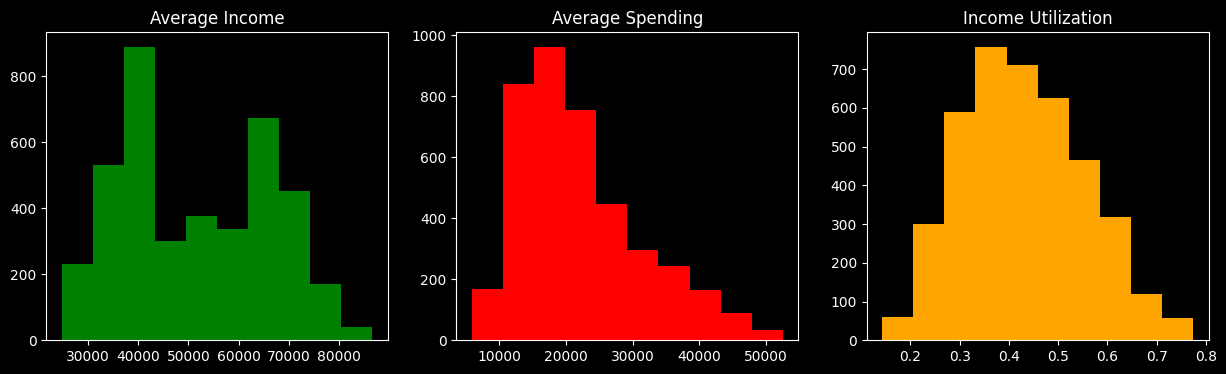

In [26]:
fig, axs = plt.subplots(1,3,figsize=(15,4))                                       # Sub plots to keep all kind of similar charts in one

axs[0].hist(a['avg_income'],color='g', label='Average Income')                  # Histogram of Average Income 
axs[0].set_title('Average Income')

axs[1].hist(a['spend_avg'],color='r', label='Average Spending')                 # Histogram of Average Spending 
axs[1].set_title('Average Spending')

axs[2].hist(a['Income_util_prctg'],color='orange',label='Income Utilization')   # Histogram of Income Utilization 
axs[2].set_title('Income Utilization')

plt.show();

In [27]:
a.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income,spend_avg,Income_util_prctg
0,ATQCUS0001,21-24,Mumbai,Salaried IT Employees,Male,Married,49767,28424.166667,0.571145
1,ATQCUS0002,21-24,Mumbai,Salaried IT Employees,Male,Married,47336,28085.666667,0.593326
2,ATQCUS0003,21-24,Mumbai,Salaried IT Employees,Male,Married,48851,26255.666667,0.537464
3,ATQCUS0004,21-24,Mumbai,Salaried IT Employees,Male,Married,45425,27109.166667,0.596790
4,ATQCUS0005,21-24,Mumbai,Salaried IT Employees,Male,Married,46732,26216.000000,0.560986


## Count plots

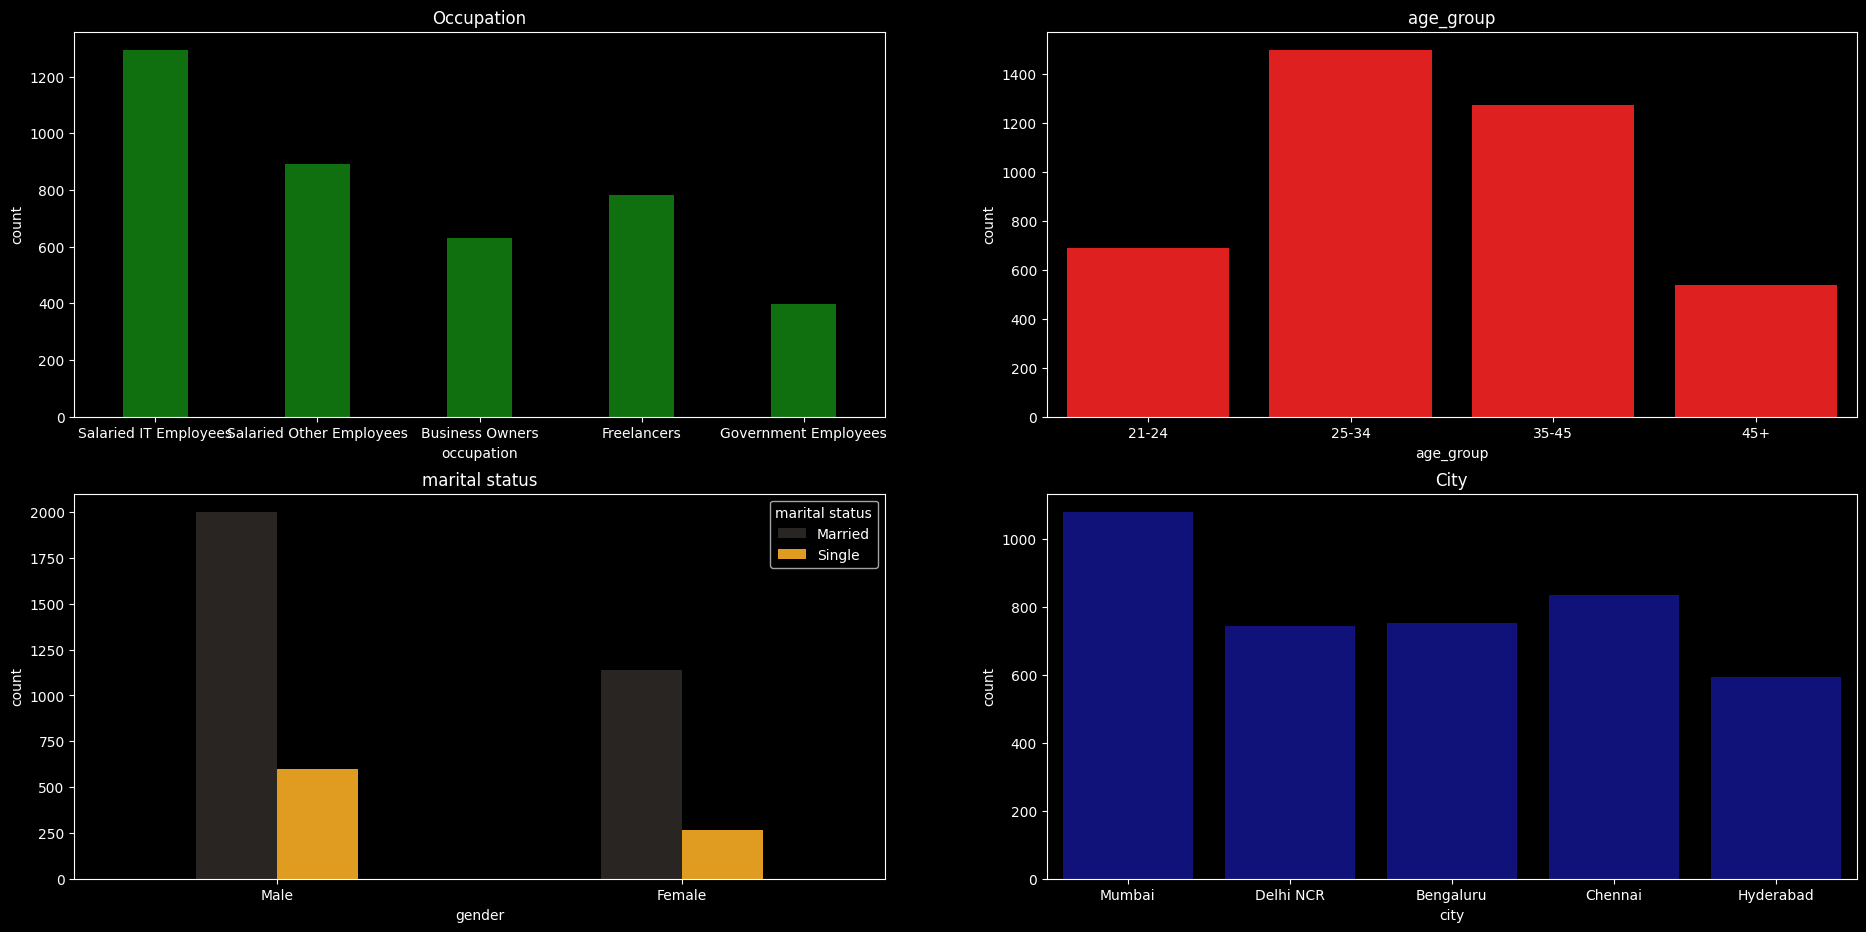

In [28]:
fig, axs = plt.subplots(2,2,figsize=(23,11))                                                        # Sub plots to keep all kind of similar charts in one

sns.countplot(x=a['occupation'],width=0.4,color='g',ax=axs[0,0]);                                   # Count plot of Occupation 
axs[0,0].set_title('Occupation')

sns.countplot(x=a['age_group'],order=['21-24', '25-34', '35-45', '45+'],color='r',ax=axs[0,1]);     # Count Plot of Age Group 
axs[0,1].set_title('age_group')

sns.countplot(x=a.gender,hue=a['marital status'],width=0.4,palette='dark:orange',ax=axs[1,0]);                # Count Plot of Marital Status
axs[1,0].set_title('marital status')

sns.countplot(x=a.city,color='darkblue',ax=axs[1,1]);                                               # Count Plot of city
axs[1,1].set_title('City')

plt.show();

Data is Exported to Tableau Public and Further insigts are taken from it 

# Thank You !